<a href="https://colab.research.google.com/github/Abhinash04/API/blob/main/BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Create a dictionary to map class labels to numeric values
classes = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

# ***Data Preparation***

In [4]:
X = []  # List to store images
Y = []  # List to store corresponding labels

# Iterate through each class in the 'classes' list
for cls in classes:
    # Construct the path to the directory for the current class in the training set
    train_path = '/content/drive/My Drive/data1/Training/' + cls

    # Iterate through each file in the training directory
    for j in os.listdir(train_path):
        # Read the image in grayscale
        img = cv2.imread(os.path.join(train_path, j), 0)

        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))

        # Append the processed image to the 'X' list
        X.append(img)

        # Append the label corresponding to the current class to the 'Y' list
        Y.append(classes[cls])

    # Construct the path to the directory for the current class in the testing set
    test_path = '/content/drive/My Drive/data1/Testing/' + cls

    # Iterate through each file in the testing directory
    for j in os.listdir(test_path):
        # Read the image in grayscale
        img = cv2.imread(os.path.join(test_path, j), 0)

        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))

        # Append the processed image to the 'X' list
        X.append(img)

        # Append the label corresponding to the current class to the 'Y' list
        Y.append(classes[cls])

# ***Exploratory Data Analysis***

In [5]:
# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

In [6]:
print(X.shape)

(3186, 224, 224)


In [7]:
print(Y.shape)

(3186,)


In [8]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

2    937
1    926
3    901
0    422
Name: count, dtype: int64


In [9]:
# Upsample the data using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X.reshape(len(X), -1), Y)

# Reshape the features back to images
X = X.reshape(-1, 224, 224)

In [10]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

0    937
1    937
2    937
3    937
Name: count, dtype: int64


In [11]:
# Now, X and Y are NumPy arrays and can be used in NumPy operations
print(X.shape)   # Shape of the array (number of images, height, width) for example
print(Y.shape)

(3748, 224, 224)
(3748,)


In [12]:
# Y is a NumPy array containing labels
unique_labels = np.unique(Y)
print(unique_labels)

[0 1 2 3]


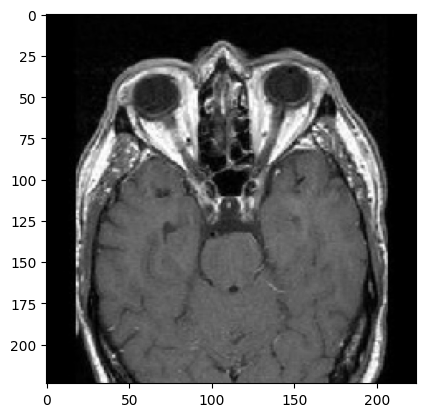

In [13]:
# Visualize the first image
plt.imshow(X[0], cmap='gray')

# ***Image Flattening***

In [14]:
# Flatten the images
X_flat = X.reshape(len(X), -1)

In [15]:
print("Original Image:")
print(X[0])
print("\nFlattened Image:")
print(X_flat[0])

Original Image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Flattened Image:
[0 0 0 ... 0 0 0]


# ***Train-Test Split***

In [16]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2998, 50176)
(2998,)
(750, 50176)
(750,)


# ***Data Normalization***

In [18]:
# Check the maximum and minimum values of the original data
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0


In [19]:
# Create a StandardScaler and fit-transform the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same scaler to the testing data
X_test = scaler.transform(X_test)

In [97]:
# Check the maximum and minimum values after Data Normalization
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

32.612759091745986 -2.676283786179526
26.027619460735334 -2.676283786179526


## **Machine Learning Algorithms**

# **Model Selection and Evaluation**

## **Model 1: Support Vector Machine Classifer (SVM)**

In [20]:
# Create an SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

SVC()

In [21]:
# Predictions on the training set
train_pred_svm = svm_classifier.predict(X_train)

# Predictions on the testing set
test_pred_svm = svm_classifier.predict(X_test)

## ***Model Evaluation for SVM***

### **Accuracy Score**

In [22]:
# Evaluate accuracy on the training set
train_accuracy_svm = accuracy_score(Y_train, train_pred_svm)
print("Training Accuracy:", train_accuracy_svm)

# Evaluate accuracy on the testing set
test_accuracy_svm = accuracy_score(Y_test, test_pred_svm)
print("Testing Accuracy:", test_accuracy_svm)

Training Accuracy: 0.9646430953969313
Testing Accuracy: 0.88


### ***Classfication Report***

In [23]:
print("\nSVM Classification Report:")
print(classification_report(Y_test, test_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       212
           1       0.87      0.78      0.83       186
           2       0.82      0.81      0.82       185
           3       0.90      0.96      0.93       167

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750



## ***Confusion Matrix***

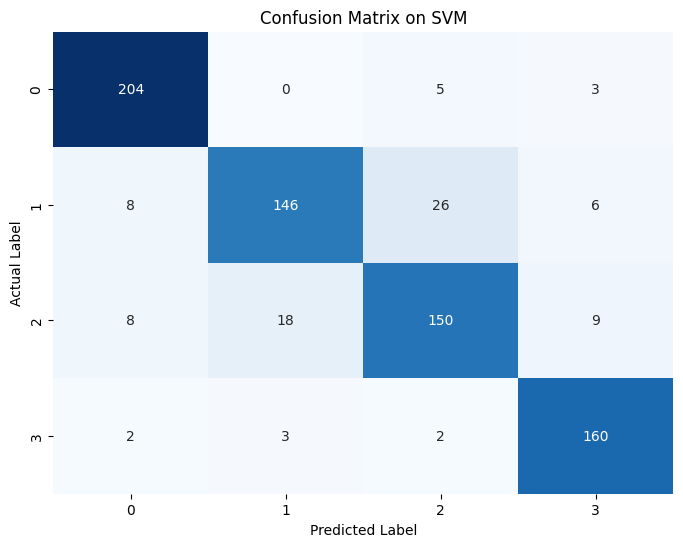

In [24]:
# Calculate the confusion matrix
conf_mat_svm = confusion_matrix(Y_test, test_pred_svm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on SVM')
plt.show()

## ***Model Predictions on SVM***

In [25]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

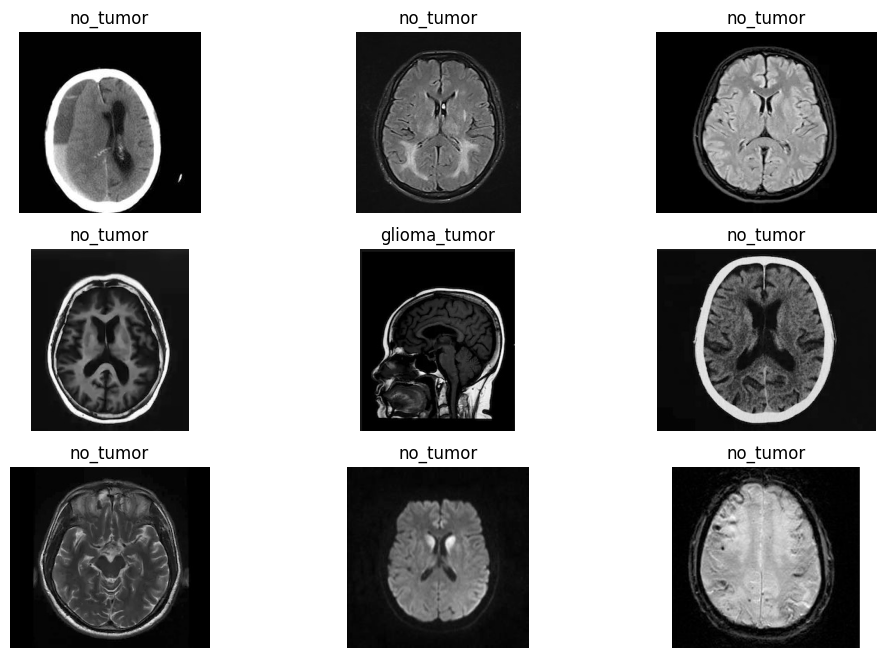

In [26]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/data1/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

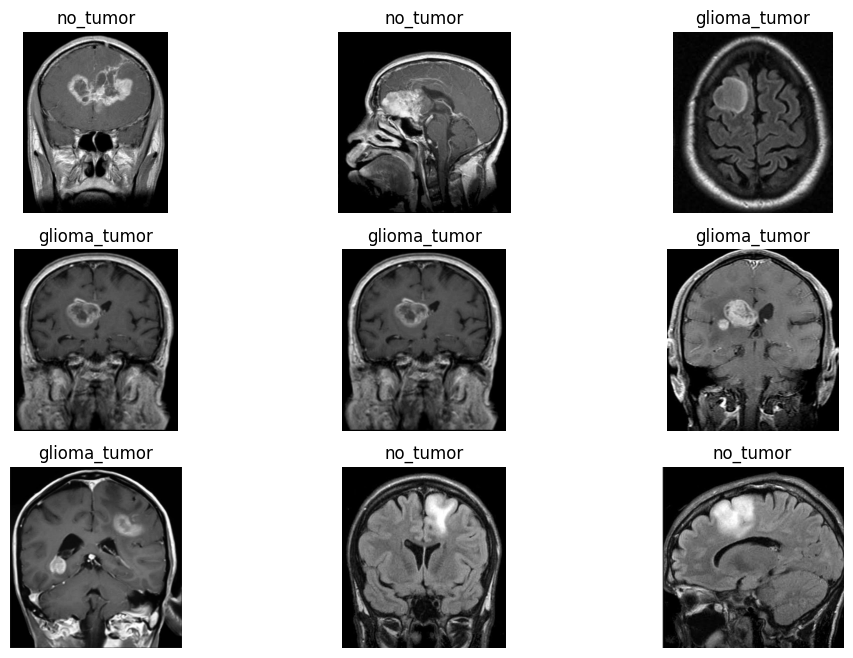

In [27]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

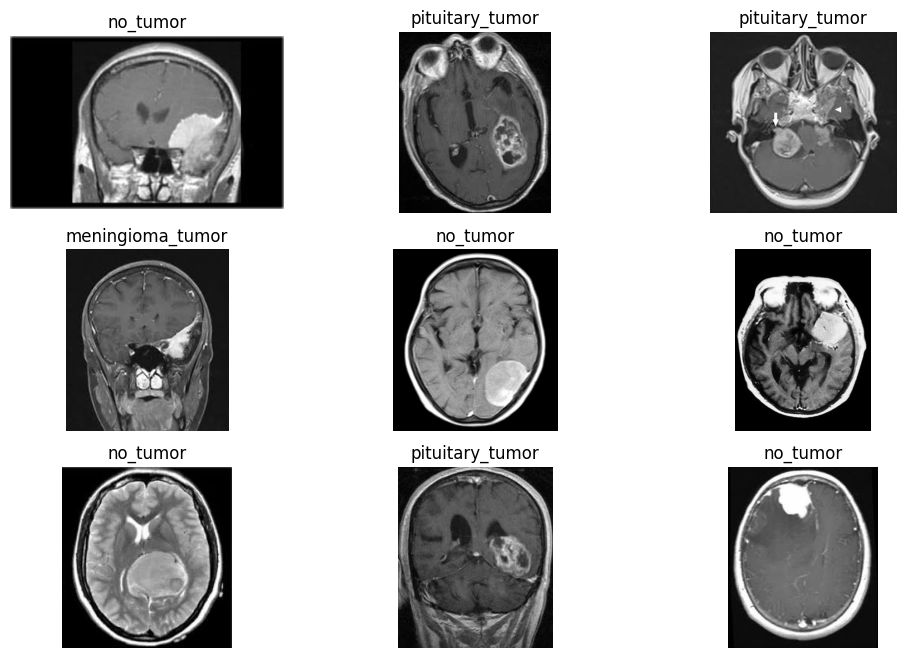

In [28]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

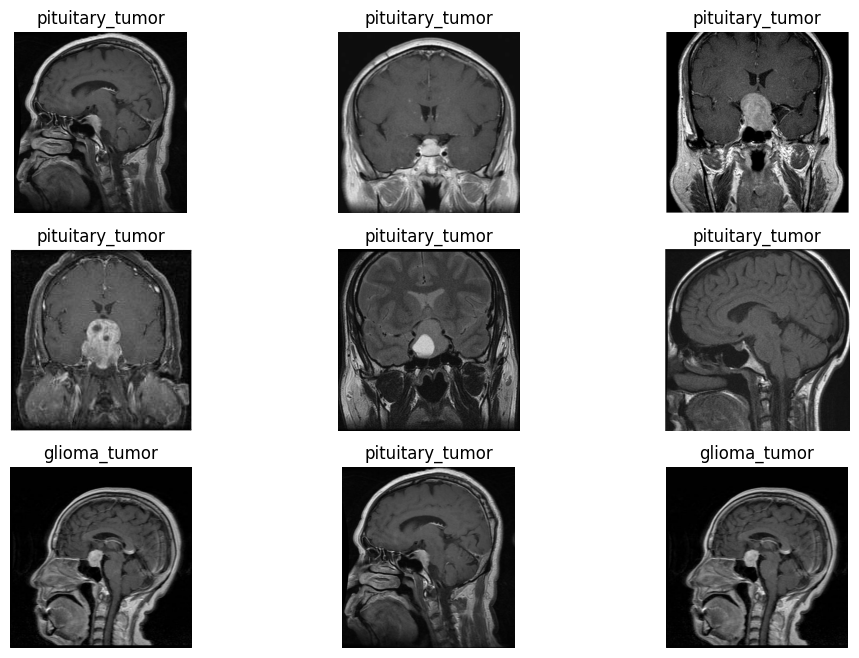

In [29]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/data1/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

## ***Model 2: Gaussian Naive Bayes Classifier***

In [30]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier on the training data
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [31]:
# Predictions on the training set
train_pred_nb = nb_classifier.predict(X_train)

# Predictions on the testing set
test_pred_nb = nb_classifier.predict(X_test)

## ***Model Evaluation for Naive Bayes***

### ***Accuracy Score***

In [32]:
# Evaluate accuracy on the training set
train_accuracy_nb = accuracy_score(Y_train, train_pred_nb)
print("Training Accuracy:", train_accuracy_nb)

# Evaluate accuracy on the testing set
test_accuracy_nb = accuracy_score(Y_test, test_pred_nb)
print("Testing Accuracy:", test_accuracy_nb)

Training Accuracy: 0.5416944629753169
Testing Accuracy: 0.5266666666666666


### ***Classification Report***

In [33]:
print("\nNaive Bayes Classification Report:")
print(classification_report(Y_test, test_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60       212
           1       0.39      0.83      0.53       186
           2       0.45      0.09      0.15       185
           3       0.74      0.64      0.69       167

    accuracy                           0.53       750
   macro avg       0.56      0.53      0.49       750
weighted avg       0.56      0.53      0.49       750



## ***Confusion Matrix***

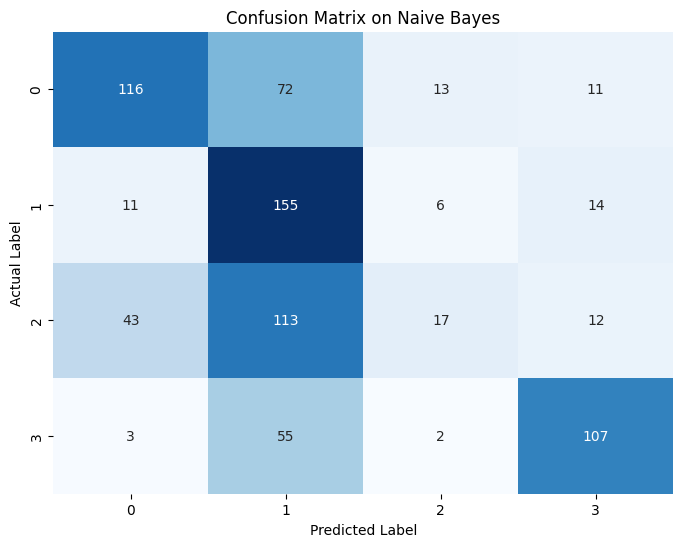

In [34]:
# Calculate the confusion matrix
conf_mat_nb = confusion_matrix(Y_test, test_pred_nb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Naive Bayes')
plt.show()

## ***Model 3: Decistion Tree Classifer***

In [35]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Make predictions on the training set
train_pred_dt = dt_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_dt = dt_classifier.predict(X_test)

## ***Model Evaluation on Decision Tree***

### ***Accuracy Score***

In [37]:
# Evaluate accuracy on the training set
train_accuracy_dt = accuracy_score(Y_train, train_pred_dt)
print("Training Accuracy:", train_accuracy_dt)

# Evaluate accuracy on the testing set
test_accuracy_dt = accuracy_score(Y_test, test_pred_dt)
print("Testing Accuracy:", test_accuracy_dt)

Training Accuracy: 1.0
Testing Accuracy: 0.8346666666666667


### ***Classification Report***

In [38]:
print("\nDecision Tree Classification Report:")
print(classification_report(Y_test, test_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       212
           1       0.81      0.76      0.78       186
           2       0.78      0.75      0.76       185
           3       0.81      0.86      0.84       167

    accuracy                           0.83       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750



## ***Confusion Matrix***

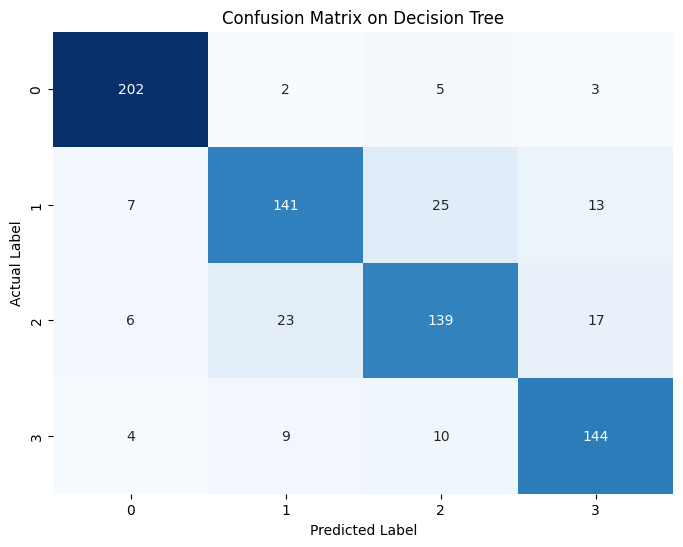

In [39]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(Y_test, test_pred_dt)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Decision Tree')
plt.show()

## ***Model 4: Random Forest classifier***

In [40]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Make predictions on the training set
train_pred_rf = rf_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_rf = rf_classifier.predict(X_test)

## ***Model Evaluation on Random Forest***

### ***Accuracy Score***

In [42]:
# Evaluate accuracy on the training set
train_accuracy_rf = accuracy_score(Y_train, train_pred_rf)
print("Training Accuracy:", train_accuracy_rf)

# Evaluate accuracy on the testing set
test_accuracy_rf = accuracy_score(Y_test, test_pred_rf)
print("Testing Accuracy:", test_accuracy_rf)

Training Accuracy: 1.0
Testing Accuracy: 0.8946666666666667


### ***Classification Report***

In [43]:
print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, test_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       212
           1       0.96      0.73      0.83       186
           2       0.82      0.89      0.85       185
           3       0.90      0.98      0.93       167

    accuracy                           0.89       750
   macro avg       0.90      0.89      0.89       750
weighted avg       0.90      0.89      0.89       750



## ***Confusion Matrix***

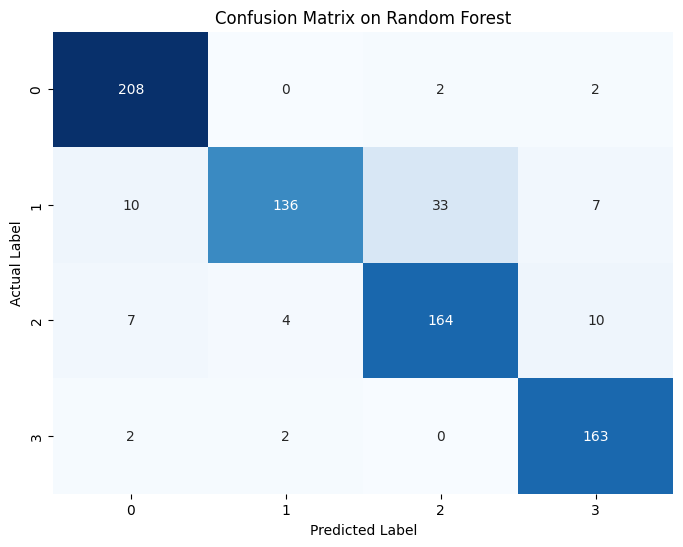

In [44]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(Y_test, test_pred_rf)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Random Forest')
plt.show()

## ***Model 5: k-Nearest Neighbors (KNN) Classifier***

In [45]:
# Create a KNN classifier (you can choose the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Make predictions on the training set
train_pred_knn = knn_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_knn = knn_classifier.predict(X_test)

## ***Model Evaluation on KNN***

### ***Accuracy Score***

In [47]:
# Evaluate accuracy on the training set
train_accuracy_knn = accuracy_score(Y_train, train_pred_knn)
print("Training Accuracy:", train_accuracy_knn)

# Evaluate accuracy on the testing set
test_accuracy_knn = accuracy_score(Y_test, test_pred_knn)
print("Testing Accuracy:", test_accuracy_knn)

Training Accuracy: 0.9496330887258172
Testing Accuracy: 0.8533333333333334


### ***Classification Report***

In [48]:
print("\nKNN Classification Report:")
print(classification_report(Y_test, test_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       212
           1       0.87      0.82      0.84       186
           2       0.88      0.68      0.77       185
           3       0.88      0.98      0.93       167

    accuracy                           0.85       750
   macro avg       0.86      0.85      0.85       750
weighted avg       0.86      0.85      0.85       750



## ***Confusion Matrix***

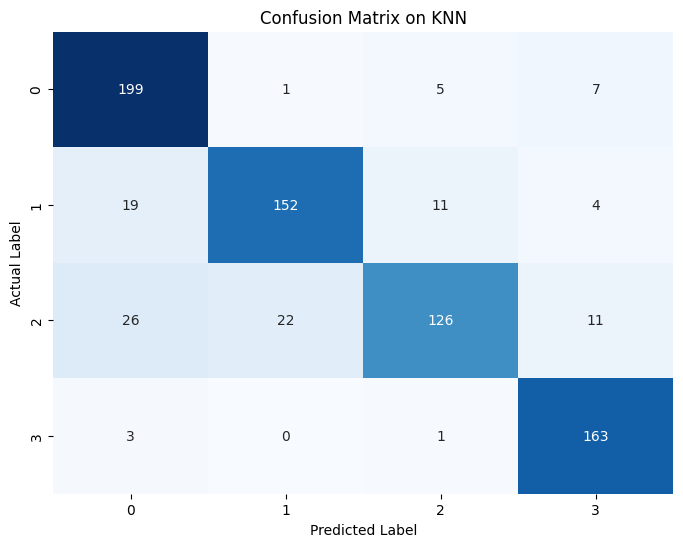

In [49]:
# Calculate the confusion matrix
conf_mat_knn = confusion_matrix(Y_test, test_pred_knn)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on KNN')
plt.show()

## ***Model 6: Logistic Regression***

In [50]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
# Make predictions on the training set
train_pred_lr = logreg_model.predict(X_train)

# Make predictions on the testing set
test_pred_lr = logreg_model.predict(X_test)

## ***Model Evaluation on Logistic Regression***

### ***Accuracy Score***

In [52]:
# Evaluate accuracy on the training set
train_accuracy_lr = accuracy_score(Y_train, train_pred_lr)
print("Training Accuracy:", train_accuracy_lr)

# Evaluate accuracy on the testing set
test_accuracy_lr = accuracy_score(Y_test, test_pred_lr)
print("Testing Accuracy:", test_accuracy_lr)

Training Accuracy: 1.0
Testing Accuracy: 0.8653333333333333


### ***Classification Report***

In [53]:
print("\nLogistic Regression Classification Report:")
print(classification_report(Y_test, test_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       212
           1       0.84      0.76      0.80       186
           2       0.78      0.76      0.77       185
           3       0.89      0.97      0.93       167

    accuracy                           0.87       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.87      0.86       750



## ***Confusion Matrix***

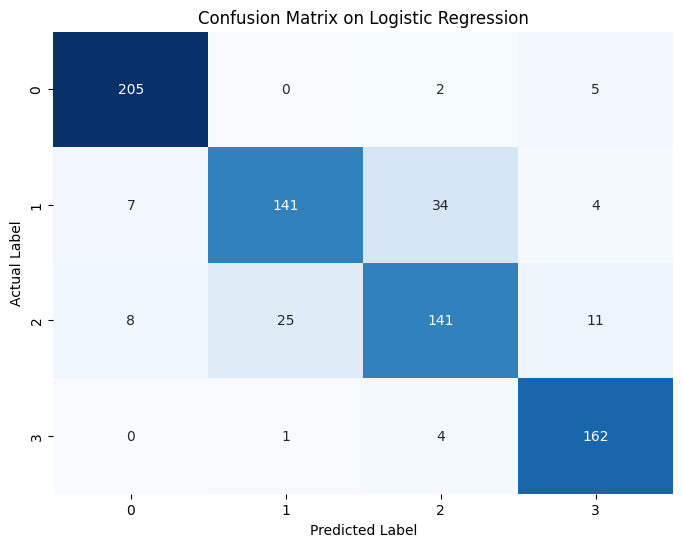

In [54]:
# Calculate the Confusion Matrix
conf_mat_lr = confusion_matrix(Y_test, test_pred_lr)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Logistic Regression')
plt.show()

## ***Model 7: XGBoost Classifer***

In [55]:
# Create an XGBoost classifier
#xgb_classifier = XGBClassifier()
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, nthread=-1)

# Train the model on the training data
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [56]:
# Make predictions on the training set
train_pred_xgb = xgb_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_xgb = xgb_classifier.predict(X_test)

## ***Model Evaluation on XGBoost***

### ***Accuracy Score***

In [57]:
# Evaluate accuracy on the training set
train_accuracy_xgb = accuracy_score(Y_train, train_pred_xgb)
print("Training Accuracy:", train_accuracy_xgb)

# Evaluate accuracy on the testing set
test_accuracy_xgb = accuracy_score(Y_test, test_pred_xgb)
print("Testing Accuracy:", test_accuracy_xgb)

Training Accuracy: 1.0
Testing Accuracy: 0.9146666666666666


### ***Classification Report***

In [58]:
print("\nXGBoost Classification Report:")
print(classification_report(Y_test, test_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       212
           1       0.99      0.79      0.88       186
           2       0.85      0.90      0.88       185
           3       0.90      1.00      0.95       167

    accuracy                           0.91       750
   macro avg       0.92      0.92      0.91       750
weighted avg       0.92      0.91      0.91       750



## ***Confusion Matrix***

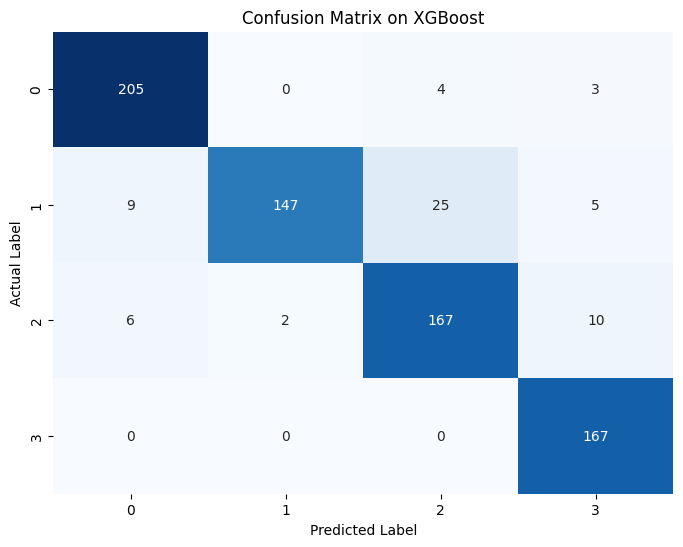

In [59]:
# Confusion Matrix
conf_mat_xgb = confusion_matrix(Y_test, test_pred_xgb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on XGBoost')
plt.show()

## ***Model Predictions on XGBoost***

In [60]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

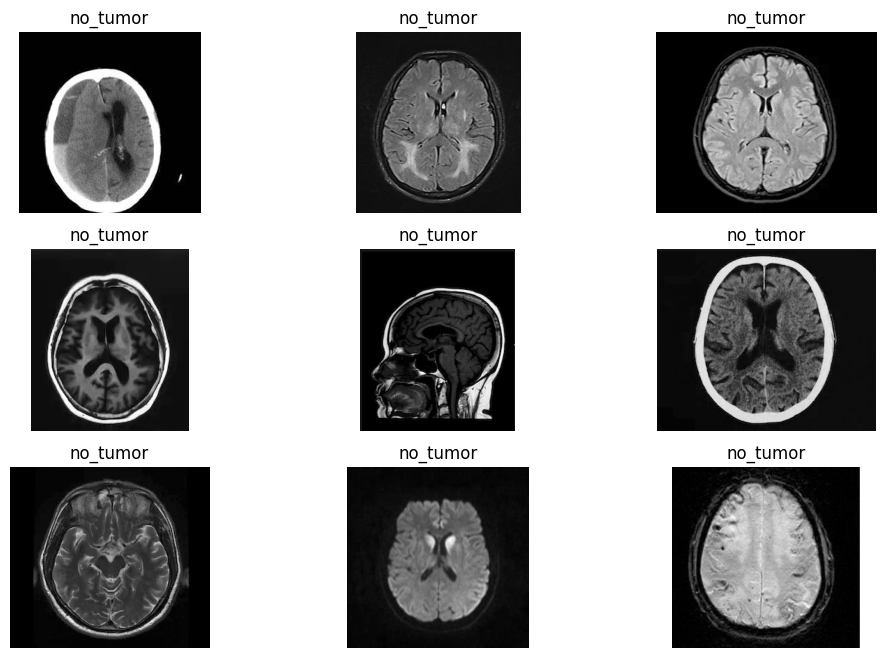

In [61]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/data1/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

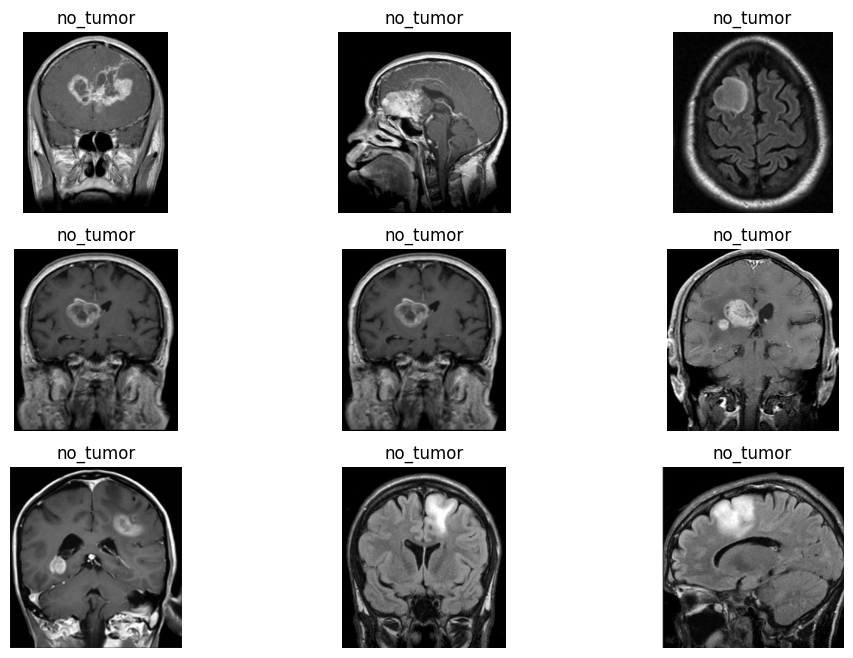

In [62]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

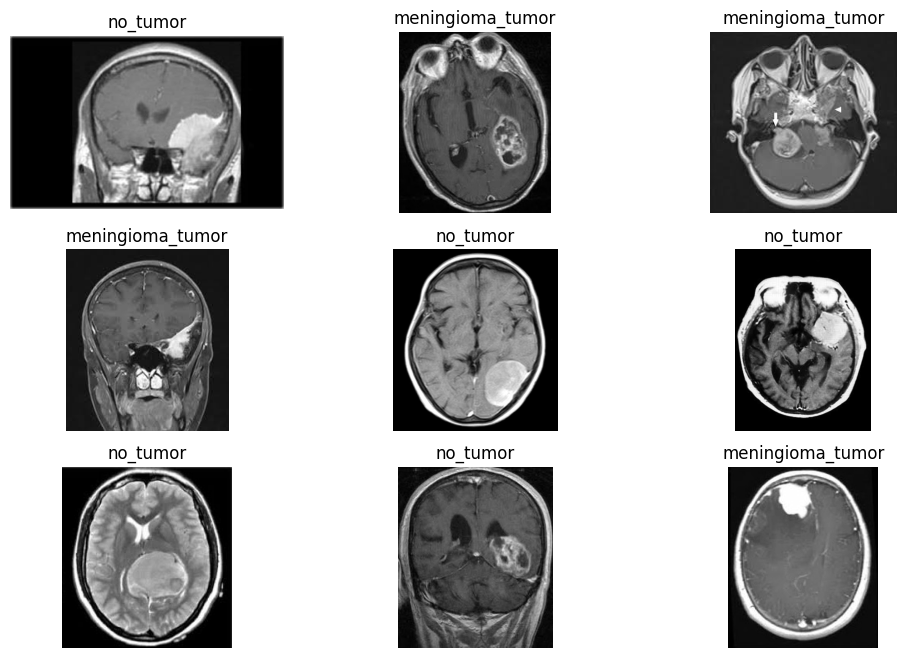

In [63]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

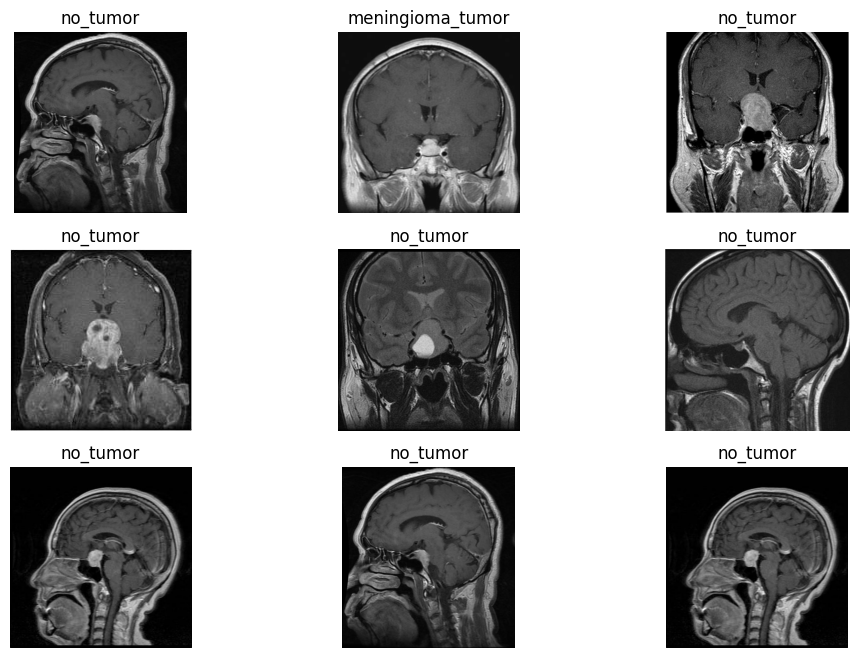

In [64]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/data1/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

## ***Model 8: MLP CLassifier***

In [65]:
# Initialize MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=100,  # Set a fixed number of epochs
    random_state=42,
)

Epoch 1/100, Training Accuracy: 0.7809, Test Accuracy: 0.7147
Epoch 2/100, Training Accuracy: 0.8893, Test Accuracy: 0.7907
Epoch 3/100, Training Accuracy: 0.9326, Test Accuracy: 0.8293
Epoch 4/100, Training Accuracy: 0.9109, Test Accuracy: 0.7880
Epoch 5/100, Training Accuracy: 0.9676, Test Accuracy: 0.8400
Epoch 6/100, Training Accuracy: 0.9793, Test Accuracy: 0.8507
Epoch 7/100, Training Accuracy: 0.9843, Test Accuracy: 0.8627
Epoch 8/100, Training Accuracy: 0.9903, Test Accuracy: 0.8773
Epoch 9/100, Training Accuracy: 0.9860, Test Accuracy: 0.8627
Epoch 10/100, Training Accuracy: 0.9937, Test Accuracy: 0.8573
Epoch 11/100, Training Accuracy: 0.9963, Test Accuracy: 0.8600
Epoch 12/100, Training Accuracy: 0.9953, Test Accuracy: 0.8653
Epoch 13/100, Training Accuracy: 0.9890, Test Accuracy: 0.8493
Epoch 14/100, Training Accuracy: 0.9980, Test Accuracy: 0.8707
Epoch 15/100, Training Accuracy: 0.9960, Test Accuracy: 0.8653
Epoch 16/100, Training Accuracy: 0.9957, Test Accuracy: 0.8653
E

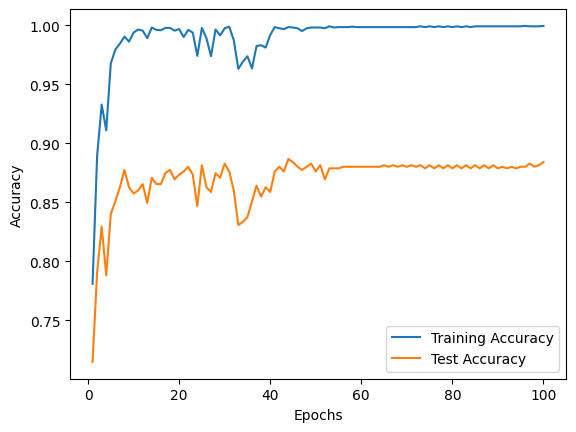

In [66]:
# Training loop without early stopping
train_accuracy_list = []
test_accuracy_list = []

# Define the number of training epochs
epochs = 100

for epoch in range(epochs):
    # Train the model on the training data
    mlp_classifier.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

    # Predictions on the training set
    train_pred_mlp = mlp_classifier.predict(X_train)

    # Predictions on the validation set
    test_pred_mlp = mlp_classifier.predict(X_test)

    # Compute training accuracy and add to the list
    train_accuracy = accuracy_score(Y_train, train_pred_mlp)
    train_accuracy_list.append(train_accuracy)

    # Compute validation accuracy and add to the list
    test_accuracy = accuracy_score(Y_test, test_pred_mlp)
    test_accuracy_list.append(test_accuracy)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy over epochs
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ***Model Evaluation on MLP CLassifier***

In [67]:
# Make predictions on the training set
train_pred_mlp = mlp_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_mlp = mlp_classifier.predict(X_test)

In [68]:
# Evaluate accuracy on the training set
train_accuracy_mlp = accuracy_score(Y_train, train_pred_mlp)
print("Training Accuracy:", train_accuracy_mlp)

# Evaluate accuracy on the testing set
test_accuracy_mlp = accuracy_score(Y_test, test_pred_mlp)
print("Testing Accuracy:", test_accuracy_mlp)

Training Accuracy: 0.9993328885923949
Testing Accuracy: 0.884


### ***Classification Report***

In [69]:
print("\nMLP Classification Report:")
print(classification_report(Y_test, test_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       212
           1       0.85      0.80      0.82       186
           2       0.79      0.79      0.79       185
           3       0.96      0.98      0.97       167

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750



## ***Confusion Matrix***

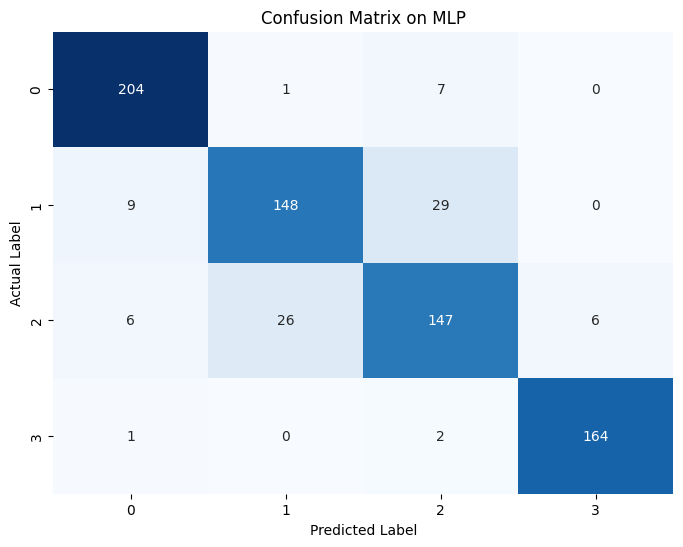

In [70]:
# Confusion Matrix
conf_mat_mlp = confusion_matrix(Y_test, test_pred_mlp)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on MLP')
plt.show()

## ***Model Predictions on MLP***

In [71]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

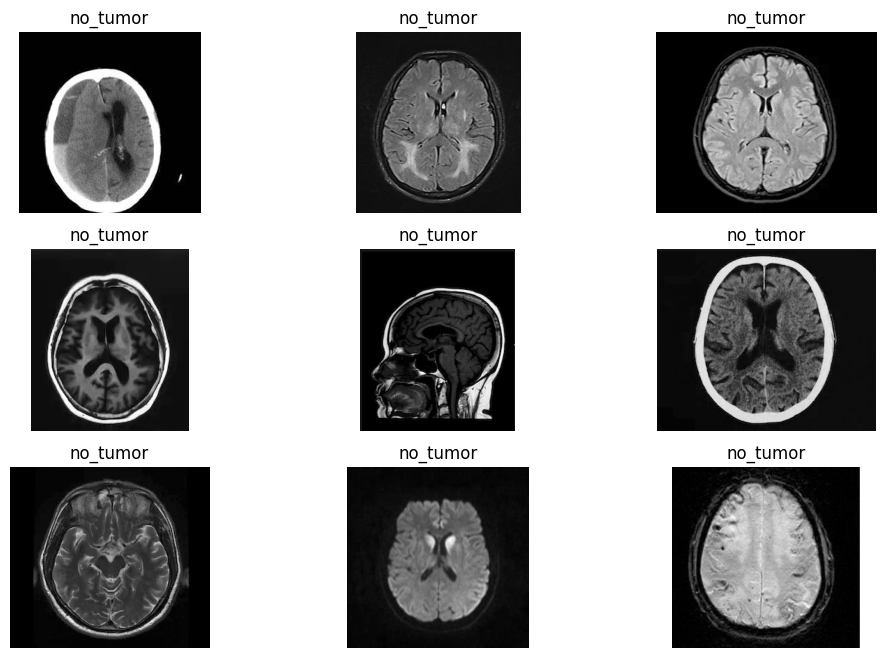

In [72]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/data1/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

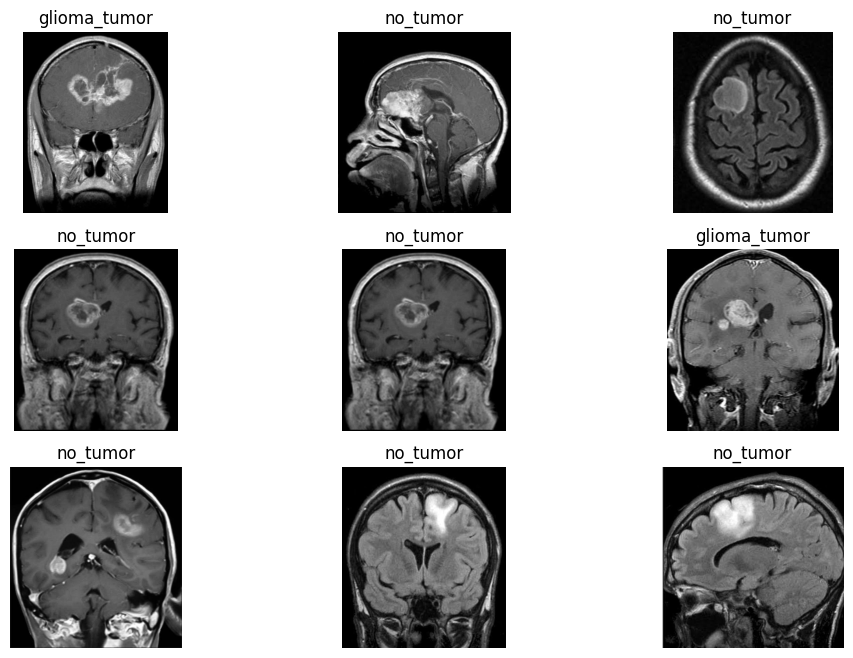

In [73]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

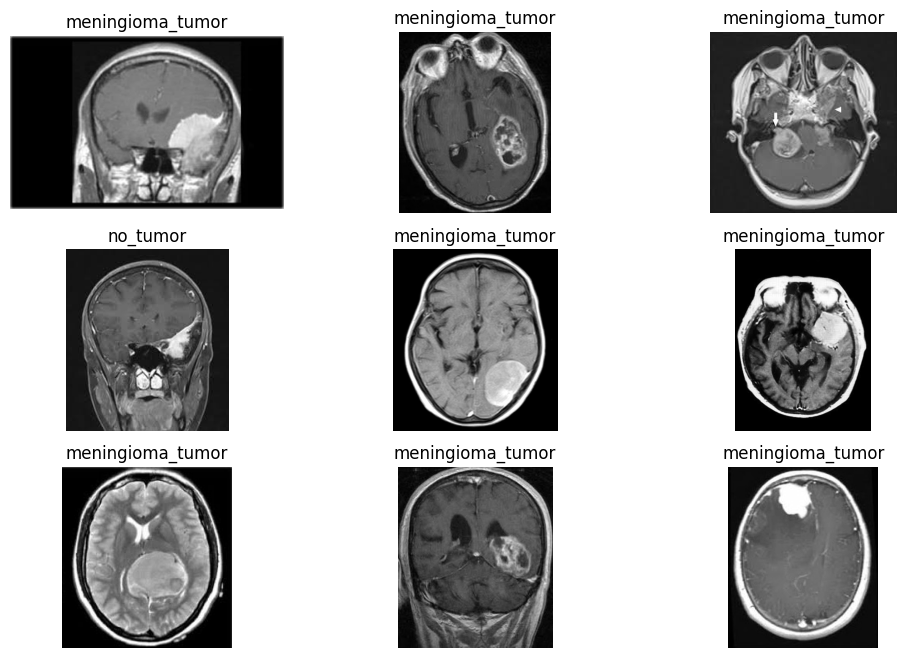

In [74]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

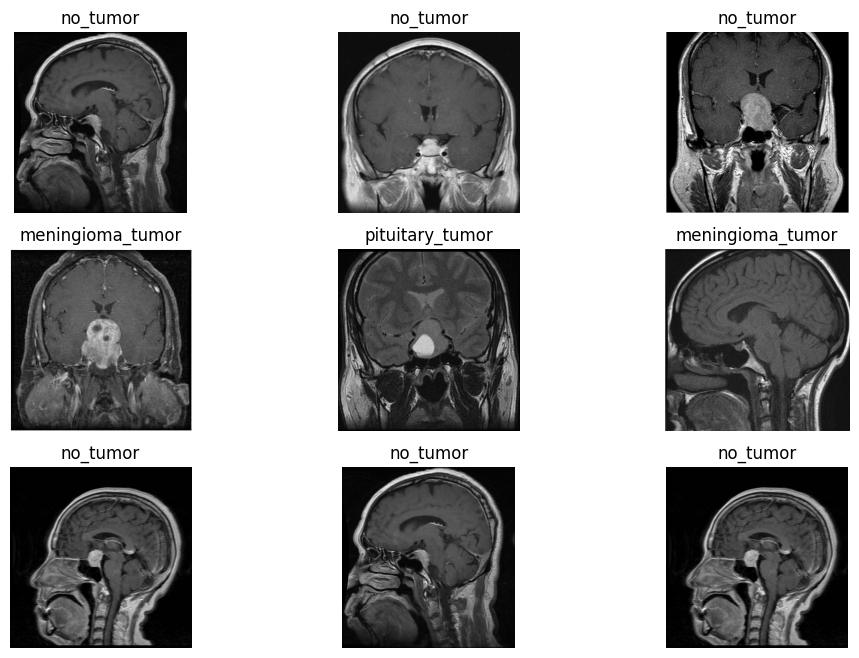

In [75]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/data1/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

# **Deep Learning Algorithm | CNN**

## ***Data Preprocessing***

### ***Train-Test Split***

In [76]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

### ***Data Augmentation***

In [77]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure initial input data is loaded and preprocessed correctly
# For example, x_train and x_val should initially be (2998, 224, 224) for grayscale images

# Check and correct the shape of x_train
if x_train.ndim == 3:  # No channel dimension
    x_train = np.expand_dims(x_train, axis=-1)
elif x_train.ndim > 4:  # Too many dimensions
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], -1)

# Check and correct the shape of x_val
if x_val.ndim == 3:
    x_val = np.expand_dims(x_val, axis=-1)
elif x_val.ndim > 4:
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], -1)

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generators
train_data_generator = datagen.flow(x_train, y_train, batch_size=32)
val_data_generator = datagen.flow(x_val, y_val, batch_size=32)


In [78]:
# Get the number of augmented images in the training set
num_train_images = len(train_data_generator)

# Get the number of augmented images in the validation set
num_val_images = len(val_data_generator)

print(f"Number of augmented images in the training set: {num_train_images}")
print(f"Number of augmented images in the validation set: {num_val_images}")

Number of augmented images in the training set: 94
Number of augmented images in the validation set: 24


## ***CNN Model***

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Feature extraction and CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,332 (91.20 MB)

 Trainable params: 23,907,332 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history = model.fit(train_data_generator, epochs=100, validation_data=val_data_generator)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.3607 - loss: 1.6226 - val_accuracy: 0.6267 - val_loss: 0.9686
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.6145 - loss: 0.9549 - val_accuracy: 0.6587 - val_loss: 0.8314
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.6937 - loss: 0.7801 - val_accuracy: 0.7080 - val_loss: 0.7413
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.7401 - loss: 0.6608 - val_accuracy: 0.7107 - val_loss: 0.7186
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.7519 - loss: 0.6102 - val_accuracy: 0.7267 - val_loss: 0.6687
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.7853 - loss: 0.5747 - val_accuracy: 0.7440 - val_loss: 0.6507
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.7961 - loss: 0.5285 - val_accuracy: 0.7707 - val_loss: 0.6155
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.8134 - loss: 0.4920 - val_accuracy: 0.7640 - val_l

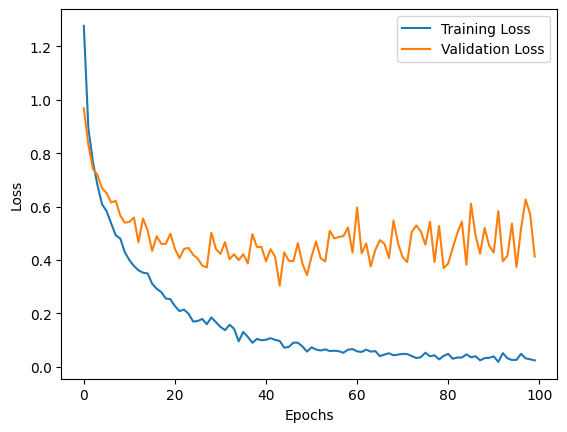

In [82]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

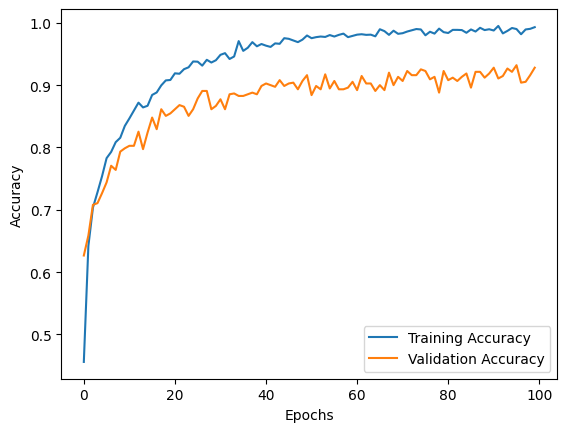

In [83]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
loss,acc = model.evaluate(train_data_generator)
print("Accuracy on Train Data:",acc)

loss,acc = model.evaluate(val_data_generator)
print("Accuracy on Test Data:",acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 75s 801ms/step - accuracy: 0.9937 - loss: 0.0203
Accuracy on Train Data: 0.9919946789741516
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 761ms/step - accuracy: 0.9163 - loss: 0.5092
Accuracy on Test Data: 0.9146666526794434


In [86]:
from tensorflow.keras.models import save_model

# Save the entire model in the Keras format
save_model(model, "my_cnn_model.keras")

# Save the entire model in HDF5 format
model.save("my_cnn_model.h5")

## ***Model Predictions on CNN***


In [87]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


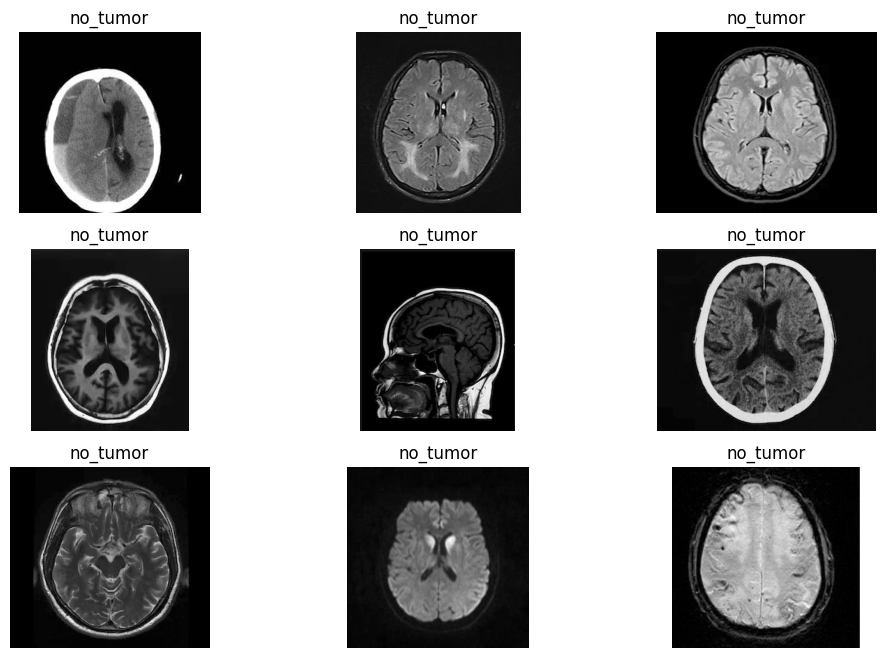

In [88]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/data1/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


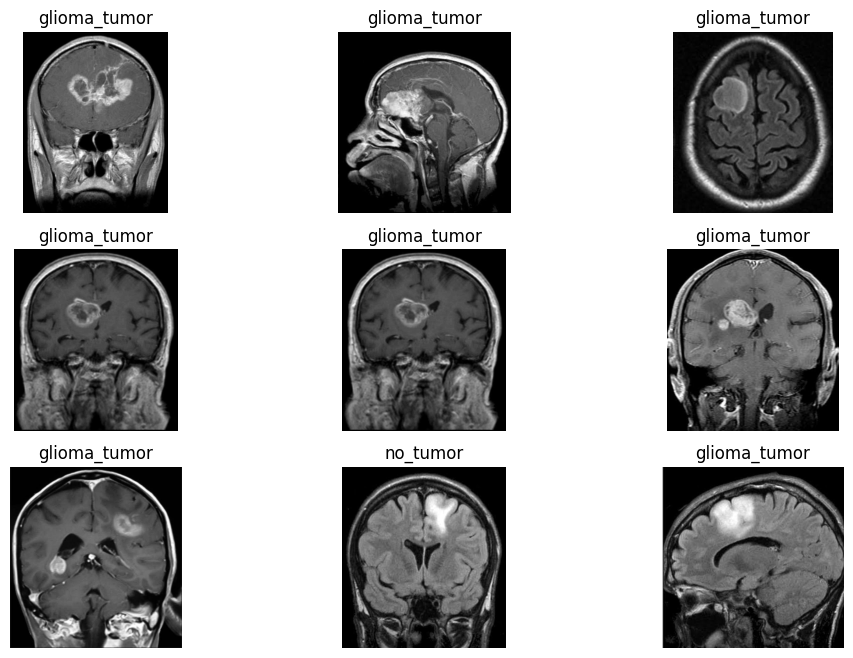

In [89]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


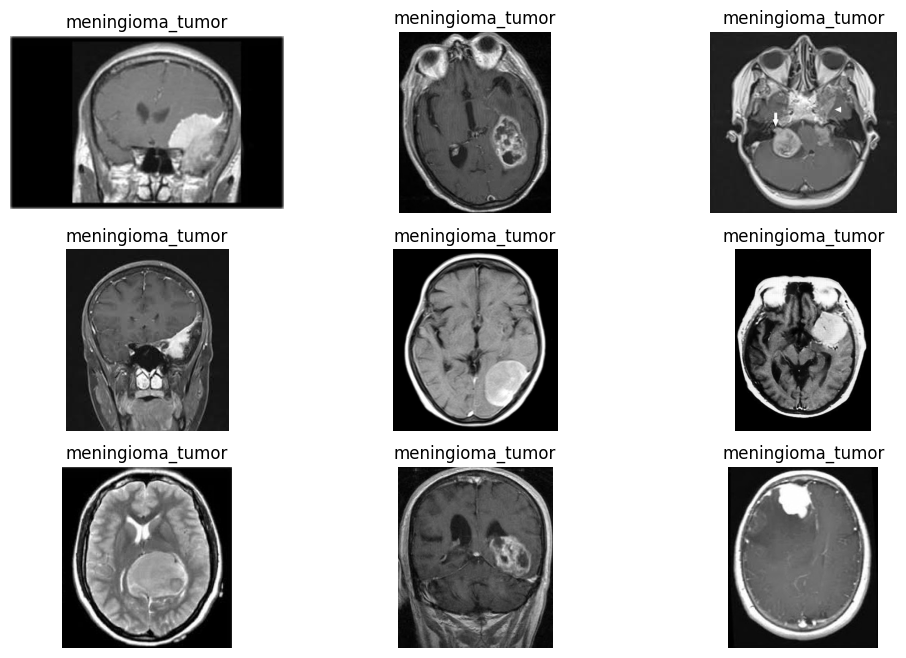

In [90]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/data1/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


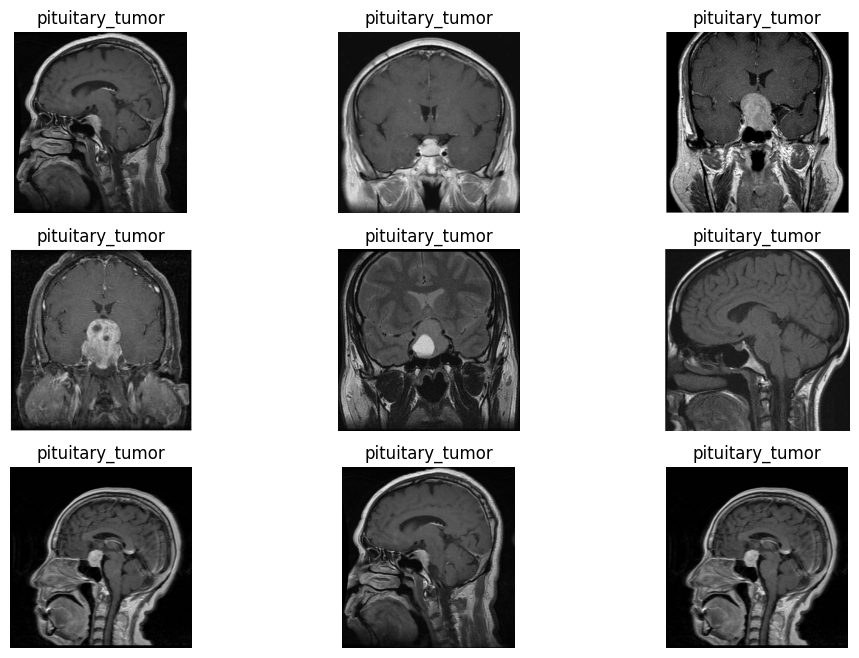

In [91]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/data1/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/data1/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()